In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from experiments.evaluation import plot_scores, display_stats, plot_ci, plot_ci_all
from datasets.load import load_classification_datasets, load_regression_datasets


In [10]:
c = load_classification_datasets()
r = load_regression_datasets()

for name, ds in c:
    X,y = ds
    print(name)
    print(X.shape)
    print(sum(y == 1)/len(y))

for name, ds in r:
    X,y = ds
    print(name)
    print(X.shape)


Statlog (Heart)
(270, 13)
0.4444444444444444
Breast Cancer
(569, 30)
0.6274165202108963
Liver Disorder
(345, 6)
0.5797101449275363
Boston Housing
(506, 13)
Wine Quality (Red)
(1599, 11)
Wine Quality (White)
(4898, 11)
Diabetes
(442, 10)


In [2]:
path_class = '/home/victor/git/rna-ppgee/artigo2/report/figures/classification_experiment_chart_data.csv'
path_reg = '/home/victor/git/rna-ppgee/artigo2/report/figures/regression_experiment_chart_data.csv'
save_path = '/home/victor/git/rna-ppgee/artigo2/report/figures'


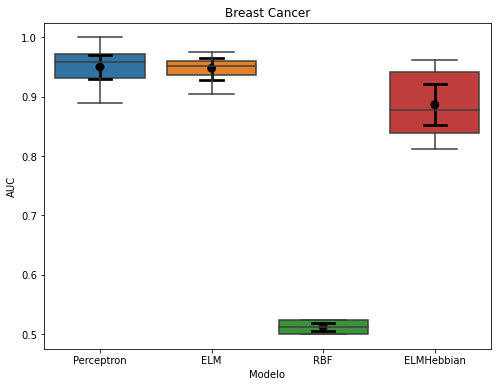

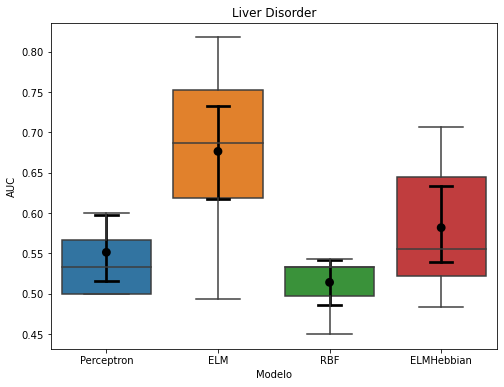

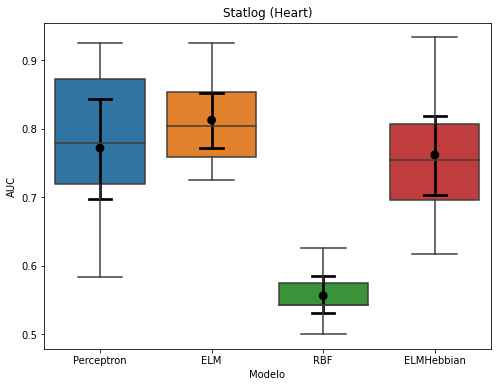

In [39]:
plot_ci(path_class, 'AUC', 'Modelo', save_path)

In [6]:
display_stats(path_class, 'AUC')

score                       \
model_name                       ELM           ELMHebbian   
dataset                                                     
Breast Cancer    0.948 (0.935,0.963)  0.887 (0.853,0.920)   
Liver Disorder   0.677 (0.621,0.733)  0.582 (0.536,0.628)   
Statlog (Heart)  0.812 (0.769,0.851)  0.762 (0.698,0.819)   

                                                           
model_name                Perceptron                  RBF  
dataset                                                    
Breast Cancer    0.950 (0.930,0.971)  0.512 (0.505,0.519)  
Liver Disorder   0.532 (0.509,0.553)  0.515 (0.498,0.537)  
Statlog (Heart)  0.772 (0.700,0.846)  0.547 (0.522,0.569)

In [5]:
display_stats(path_reg, 'MSE')

score                       \
model_name                      Adaline                  ELM   
dataset                                                        
Boston Housing      0.069 (0.039,0.096)  0.012 (0.008,0.016)   
Diabetes            0.078 (0.066,0.091)  0.029 (0.025,0.033)   
Wine Quality (Red)  0.037 (0.031,0.043)  0.017 (0.016,0.019)   

                                         
model_name                          RBF  
dataset                                  
Boston Housing      0.044 (0.025,0.061)  
Diabetes            0.054 (0.048,0.061)  
Wine Quality (Red)  0.024 (0.022,0.026)

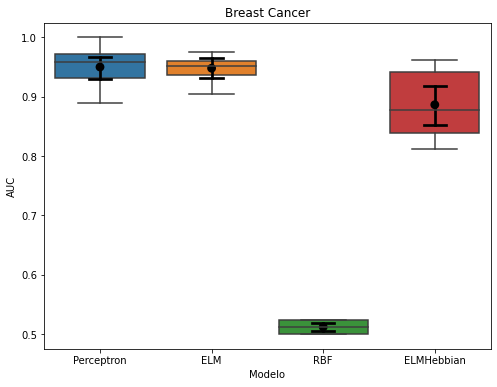

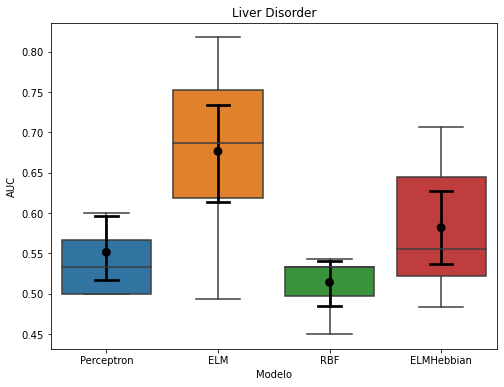

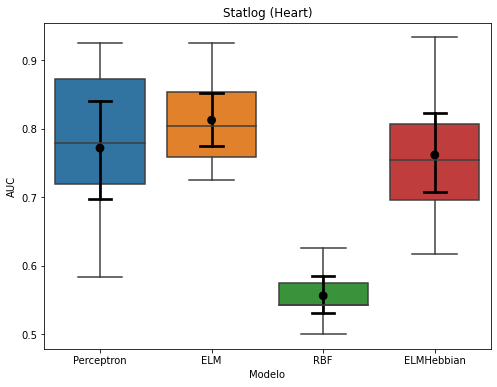

In [40]:
plot_scores(path_class, 'AUC', 'Modelo', save_path) 

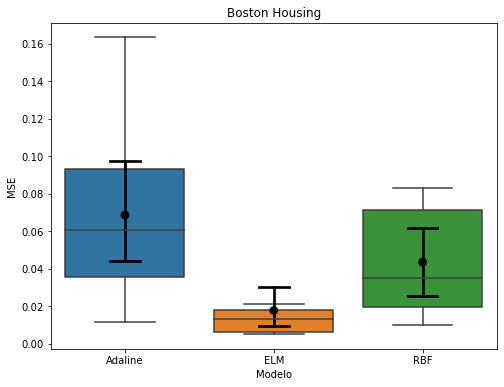

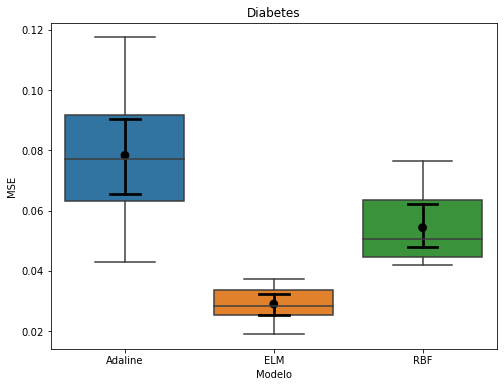

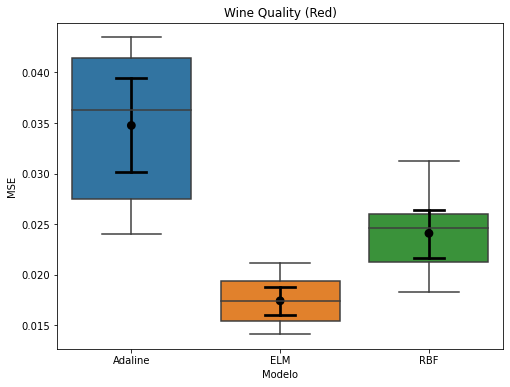

In [4]:
plot_scores(path_reg, 'MSE', 'Modelo', save_path)